#1.Data Collection

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [27]:
# getting the data
df = pd.read_csv('/content/Mall_Customers.csv')

In [28]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [30]:
df.shape

(200, 5)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#2.Data Preprocessing

In [33]:
#checking the missing values
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [34]:
df = df.drop(columns=['CustomerID','Gender','Age'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [35]:
#Scaling the data
x = StandardScaler()
x_scaled = x.fit_transform(df)

#3.Model Evaluation - Elbow Method (WCSS)

In [36]:
wcss = []

for i in range(1,11):
    kmeans =KMeans(n_clusters=i,init='k-means++',random_state=11)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

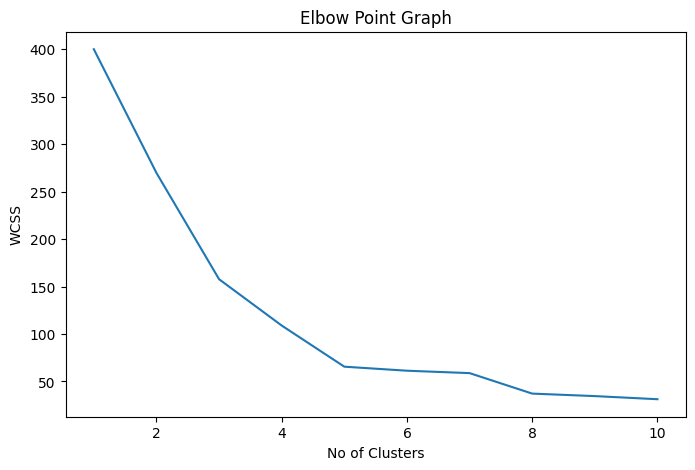

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(range(1,11),wcss)
plt.title('Elbow Point Graph')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
# Silhouette analysis for k = 2 to 10
silhouette_scores = []

In [47]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={i}: {score:.4f}")

Silhouette Score for k=2: 0.3973
Silhouette Score for k=3: 0.4666
Silhouette Score for k=4: 0.4943
Silhouette Score for k=5: 0.5547
Silhouette Score for k=6: 0.5138
Silhouette Score for k=7: 0.5020
Silhouette Score for k=8: 0.4550
Silhouette Score for k=9: 0.4567
Silhouette Score for k=10: 0.4448


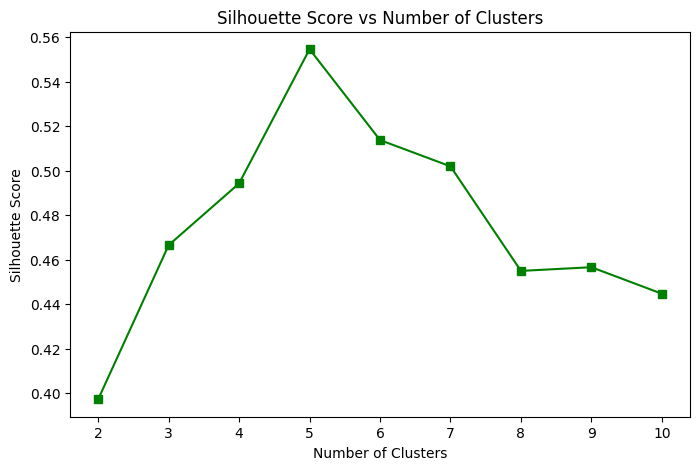

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='s', color='green')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

#4.Model Building

In [50]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(x_scaled)

print(cluster_labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


#5.Visualization

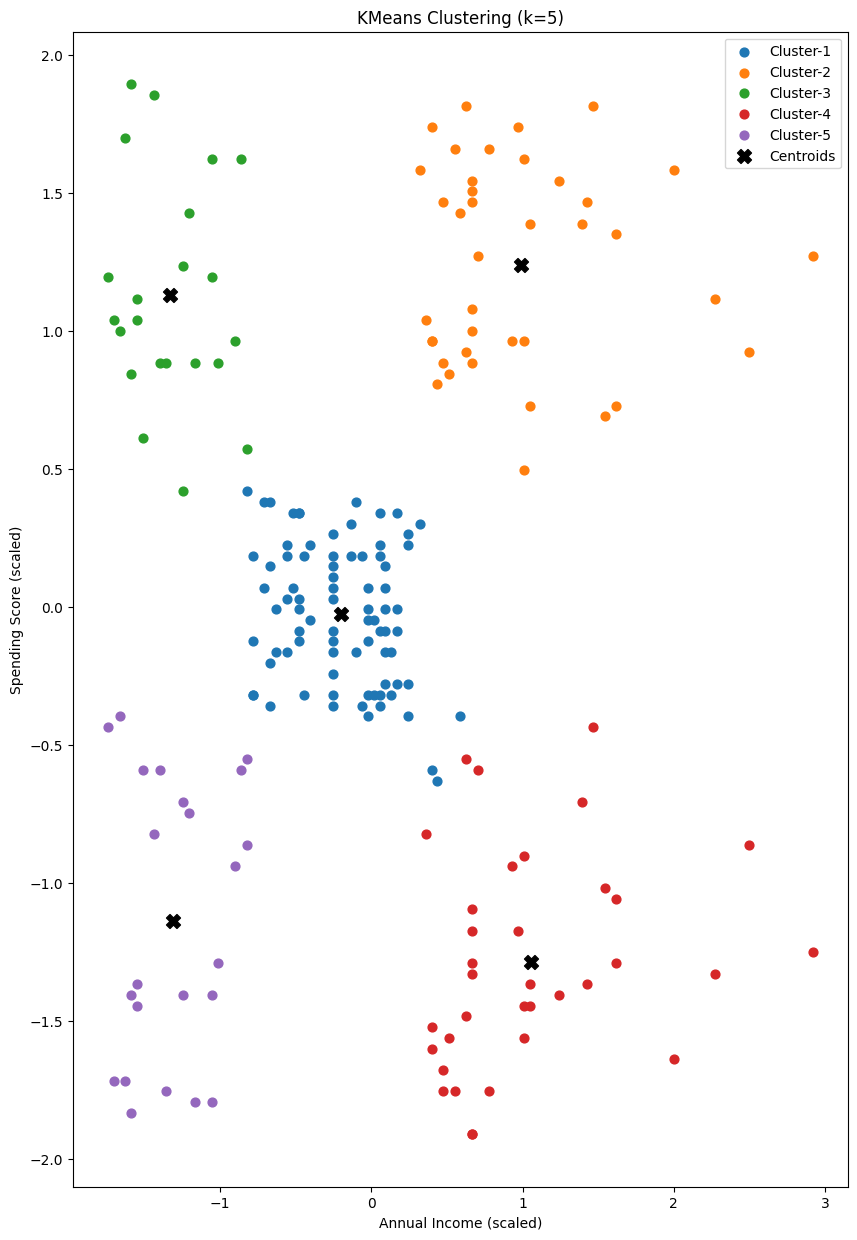

In [53]:
plt.figure(figsize=(10,15))

for i in range(optimal_k):
    plt.scatter(x_scaled[cluster_labels==i,0],x_scaled[cluster_labels==i,1],s=40,label=f'Cluster-{i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='black', marker='X', label='Centroids')

plt.title(f"KMeans Clustering (k={optimal_k})")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()